<a href="https://colab.research.google.com/github/mhriyad99/NLP-practice-Project/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spam Classifier
This is an NLP project. The aim of this project is to understand the preprocessing of the text data and learn to make the data clean to use it in the Machine Learning Model. And for this, spam dataset is used which has many spam emails and legit emails. First we will process this data for our ML algorithm and then we will built our model from that.

In [1]:
# import important modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import punctuation 


In [2]:
data = pd.read_csv("/content/spam.tsv", sep = '\t')

In [3]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
data.shape

(5572, 4)

In [5]:
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

###In this step we are going to find frequent words that are used in both legitimate and spam messages.

In [7]:
# collect words from the dataset

def collect_words(data, label):
  collected_words = " "
  # iterate through the csv file
  for val in data.message[data['label'] == label]:
    
    #converting each value to string
    val = str(val)

    # split the value
    tokens = val.split()

    #convert the tokens to lowercase
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
    
    for words in tokens:
      collected_words = collected_words + words + " "
    
  return collected_words
    

Total words 104304


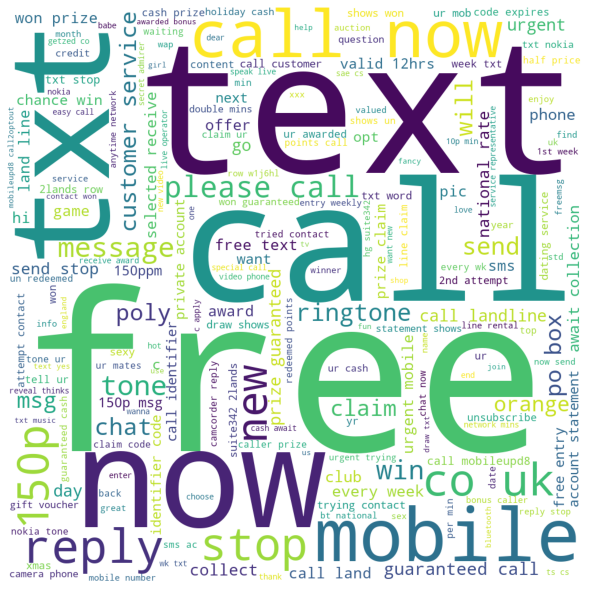

In [8]:
# visualize spam labeled sms

from wordcloud import WordCloud, STOPWORDS

cloud_stopwords = set(STOPWORDS)
spam_words = collect_words(data, label = "spam")
print("Total words {}".format(len(spam_words)))

wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'white',
    stopwords = cloud_stopwords,
    min_font_size = 10

).generate(spam_words)

# Plot the word cloud image
plt.figure(figsize = (10,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()




Total ham words 349132


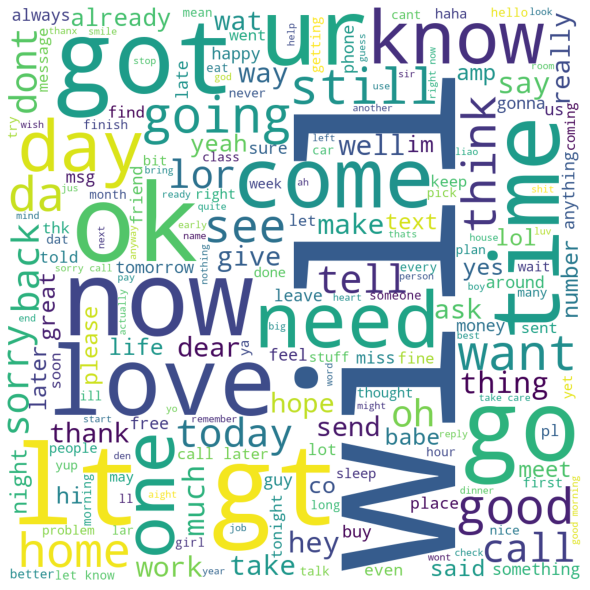

In [9]:
cloud_stopwords = set(STOPWORDS)
ham_words = collect_words(data, "ham")
print("Total ham words {}".format(len(ham_words)))


wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'white',
    stopwords = cloud_stopwords,
    min_font_size = 10
).generate(ham_words)

plt.figure(figsize = (10,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [10]:
#replacing ham with 0 and spam with 1

n_data = data.replace({"ham": 0, "spam": 1})
n_data.head()

,label,message,length,punct
0,0,"Go until jurong point, crazy.. Available only ...",111,9
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,0,U dun say so early hor... U c already then say...,49,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,2


##Natural Language Processing



*   Tokennizing the string
*   Lowercasing

*   Removing stopwords and punctuation
*   Lemmatization









In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
nltk.download("stopwords")
nltk.download("wordnet")
stop_words = stopwords.words('english')

def clean_text(text, remove_stopwords = True, lemmatize_words = True):

  # clean the text

    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r"ur", " your ", text)
    text = re.sub(r" nd "," and ",text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r" tkts "," tickets ",text)
    text = re.sub(r" c "," can ",text)
    text = re.sub(r" e g ", " eg ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
    text = re.sub(r" u "," you ",text)
    text = text.lower()  # set in lowercase 

    # remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])

    # optionally remove stopwords
    if remove_stopwords:
      text = text.split()
      text = [w for w in text if w not in stop_words]
      text = " ".join(text)

    # optionally lemmatize words
    if lemmatize_words:
      text = text.split()
      lemmatizer = WordNetLemmatizer()
      lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
      text = " ".join(lemmatized_words)

    return(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
# cleaning the data
n_data['cleaned message']  = n_data['message'].apply(clean_text)

In [13]:
n_data.head()

,label,message,length,punct,cleaned message
0,0,"Go until jurong point, crazy.. Available only ...",111,9,go j ong point crazy available bugis n great w...
1,0,Ok lar... Joking wif u oni...,29,6,ok lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,free entry wkly comp win fa cup final ticket 2...
3,0,U dun say so early hor... U c already then say...,49,6,u dun say early hor u already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,2,nah think go usf life around though


####Training the Machine Learning Model

In [14]:
X = n_data['message']
y = n_data['label']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

x_train_trans = vectorizer.fit_transform(x_train)
x_test_trans = vectorizer.transform(x_test)

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

nb = MultinomialNB()
nb.fit(x_train_trans,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
y_pred = nb.predict(x_test_trans)

In [19]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print(score)

0.9874439461883409


In [20]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

0.9551282051282052

####Conclusion
The accuracy score is about 98% and the f1 score is .95 out of 1 which is pretty sweet for a machine learning model